In [1]:
from pathlib import Path
import pickle as pkl
import glob
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook
%matplotlib notebook

In [3]:
def NSE(x, y):
    return 1 - np.mean((x-y)**2) / np.mean((x - np.mean(x))**2)

In [4]:
basin_file = '531_basin_list.txt'
autoregression_holdout_dir = './runs/autoregression/test'
autoregression_noholdout_dir = './runs/autoregression/test'
assimilation_holdout_dir = './runs/simulation/assimilation/'
assimilation_dir = './runs/simulation/assimilation_without_holdout_training/'
simulation_dir = './runs/simulation'
metrics = ['NSE']

In [5]:
with Path(basin_file).open('r') as fp:
    basins = sorted(basin.strip() for basin in fp if basin.strip())
print(f"There are {len(basins)} basins.")

There are 531 basins.


In [6]:
autoregression_run_dirs = glob.glob(autoregression_dir + '/**')
for i, run_dir in enumerate(autoregression_run_dirs):
    autoregression_run_dirs[i] = run_dir.split('/')[-1]
print(f"There are {len(autoregression_run_dirs)} autoregression runs.")

There are 60 autoregression runs.


In [7]:
assimilation_holdout_run_dirs = glob.glob(assimilation_holdout_dir + '/**')
for i, run_dir in enumerate(assimilation_holdout_run_dirs):
    assimilation_holdout_run_dirs[i] = run_dir.split('/')[-1]
print(f"There are {len(assimilation_holdout_run_dirs)} assimilation runs.")

There are 60 assimilation runs.


In [8]:
assimilation_noholdout_run_dirs = glob.glob(assimilation_noholdout_dir + '/**')
for i, run_dir in enumerate(assimilation_noholdout_run_dirs):
    assimilation_noholdout_run_dirs[i] = run_dir.split('/')[-1]
print(f"There are {len(assimilation_noholdout_run_dirs)} assimilation runs.")

There are 110 assimilation runs.


In [9]:
simulation_run_dirs = glob.glob(simulation_dir + '/simulation_*')
for i, run_dir in enumerate(simulation_run_dirs):
    simulation_run_dirs[i] = run_dir.split('/')[-1]
print(f"There are {len(simulation_run_dirs)} simulation runs.")

There are 1 simulation runs.


In [10]:
lead_times = []
holdout_fractions = []
ensembles = []
for run in autoregression_run_dirs:
    holdout_fractions.append(float(run.split('_')[0]))    
    lead_times.append(int(run.split('_')[1]))  
    ensembles.append(int(run.split('_')[2]))

holdout_fractions = sorted(list(set(holdout_fractions)))
lead_times = sorted(list(set(lead_times)))
ensembles = sorted(list(set(ensembles)))

In [11]:
run_index = pd.MultiIndex.from_product((holdout_fractions, lead_times, ensembles))
autoregression_statistics = {}
assimilation_holdout_statistics = {}
assimilation_noholdout_statistics = {}
simulation_statistics = {}
for metric in metrics:
    autoregression_statistics[metric] = pd.DataFrame(index=basins, 
                                                     columns=run_index,
                                                     dtype=np.float64)
    assimilation_holdout_statistics[metric] = pd.DataFrame(index=basins, 
                                                           columns=run_index,
                                                           dtype=np.float64)
    assimilation_noholdout_statistics[metric] = pd.DataFrame(index=basins, 
                                                             columns=run_index,
                                                             dtype=np.float64)
    simulation_statistics[metric] = pd.DataFrame(index=basins, 
                                                 columns=run_index,
                                                 dtype=np.float64)

In [12]:
for run in simulation_run_dirs:
    en = int(run.split('_')[1])
    with open(simulation_dir + '/' + run + '/test/model_epoch030/test_results.p', 'rb') as f:
        run_data = pkl.load(f)
    for basin in basins:
        for metric in metrics:
            simulation_statistics[metric].loc[basin, (0, 1, en)] = run_data[basin]['1D'][metric]

In [13]:
simulation_statistics['NSE']

0.0                     0.1              ... 0.8              \
                1   2   3   5   7   10  1   2   3   5   ...  3   5   7   10   
                 0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   
01022500  0.882591 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
01031500  0.893236 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
01047000  0.883933 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
01052500  0.857454 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
01054200  0.788125 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
...            ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..   
14309500  0.882030 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
14316700  0.905411 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
14325000  0.917829 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
14362250  0.913764 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
14400000  0.903710 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   

         0.9                      
          1   2   3   5   7   10  
           0   0   0   0   0   0  
01022500 NaN NaN NaN NaN NaN NaN  
01031500 NaN NaN NaN NaN NaN NaN  
01047000 NaN NaN NaN NaN NaN NaN  
01052500 NaN NaN NaN NaN NaN NaN  
01054200 NaN NaN NaN NaN NaN NaN  
...       ..  ..  ..  ..  ..  ..  
14309500 NaN NaN NaN NaN NaN NaN  
14316700 NaN NaN NaN NaN NaN NaN  
14325000 NaN NaN NaN NaN NaN NaN  
14362250 NaN NaN NaN NaN NaN NaN  
14400000 NaN NaN NaN NaN NaN NaN  

[531 rows x 60 columns]

In [14]:
for run in tqdm(autoregression_run_dirs):
    hf = float(run.split('_')[0])   
    lt = int(run.split('_')[1])
    en = int(run.split('_')[2])
    try:
        with open(autoregression_dir + '/' + run + '/test/model_epoch030/test_results.p', 'rb') as f:
            run_data = pkl.load(f)
        for basin in basins:
#             sim = run_data[basin]['1D']['xr']['QObs(mm/d)_sim'].values
#             autoregression_statistics['NSE'].loc[basin, (hf, lt, en)] = NSE(obs[basin], sim)
            for metric in metrics:
                autoregression_statistics[metric].loc[basin, (hf, lt, en)] = run_data[basin]['1D'][metric]
    except: 
        pass

In [15]:
autoregression_statistics['NSE']

0.0                                                    \
                1         2         3         5         7         10   
                 0         0         0         0         0         0   
01022500  0.964944  0.919909  0.909181  0.873662  0.877596  0.840019   
01031500  0.942173  0.917611  0.909886  0.895213  0.901162  0.896470   
01047000  0.918753  0.906037  0.882877  0.877403  0.881532  0.865509   
01052500  0.928441  0.900684  0.878417  0.841993  0.782406  0.866382   
01054200  0.829099  0.801823  0.797352  0.774283  0.785455  0.779951   
...            ...       ...       ...       ...       ...       ...   
14309500  0.921249  0.884716  0.903883  0.901023  0.879150  0.901968   
14316700  0.950288  0.917130  0.914793  0.899867  0.907113  0.888930   
14325000  0.951777  0.932361  0.922952  0.909836  0.903850  0.912098   
14362250  0.918125  0.884239  0.912332  0.908847  0.869427  0.794788   
14400000  0.933834  0.891842  0.886317  0.893335  0.889069  0.889560   

               0.1                                ...       0.8            \
                1         2         3         5   ...        3         5    
                 0         0         0         0  ...         0         0   
01022500  0.960052  0.920322  0.908548  0.876572  ...  0.888400  0.884799   
01031500  0.938538  0.917664  0.912757  0.894893  ...  0.891284  0.894146   
01047000  0.918188  0.907640  0.882130  0.878438  ...  0.871297  0.868297   
01052500  0.928198  0.897387  0.877593  0.844134  ...  0.867426  0.819808   
01054200  0.824914  0.797730  0.797390  0.773265  ...  0.769206  0.756582   
...            ...       ...       ...       ...  ...       ...       ...   
14309500  0.920883  0.884294  0.903263  0.901897  ...  0.901975  0.889313   
14316700  0.948131  0.918785  0.917814  0.899398  ...  0.908458  0.890929   
14325000  0.950516  0.931486  0.923857  0.910217  ...  0.923279  0.912033   
14362250  0.909127  0.881893  0.909428  0.910731  ...  0.897697  0.887381   
14400000  0.931381  0.894920  0.886955  0.892479  ...  0.893769  0.899737   

                                   0.9                                \
                7         10        1         2         3         5    
                 0         0         0         0         0         0   
01022500  0.876312  0.868982  0.895797  0.882263  0.878870  0.876289   
01031500  0.914925  0.903028  0.888246  0.887385  0.888401  0.886190   
01047000  0.877451  0.866076  0.854956  0.886298  0.873237  0.850303   
01052500  0.784664  0.863391  0.884039  0.872138  0.856166  0.808016   
01054200  0.781380  0.770953  0.704028  0.767232  0.758526  0.751623   
...            ...       ...       ...       ...       ...       ...   
14309500  0.880853  0.892073  0.861138  0.879121  0.904993  0.882105   
14316700  0.886514  0.893401  0.887452  0.869130  0.889740  0.879632   
14325000  0.919931  0.919784  0.928914  0.917999  0.920646  0.913179   
14362250  0.860789  0.794792  0.882294  0.851635  0.906067  0.893381   
14400000  0.899845  0.882072  0.908240  0.880937  0.884245  0.900753   

                              
                7         10  
                 0         0  
01022500  0.869145  0.863937  
01031500  0.908315  0.902545  
01047000  0.873376  0.869449  
01052500  0.784679  0.856569  
01054200  0.769810  0.761619  
...            ...       ...  
14309500  0.871133  0.890337  
14316700  0.877194  0.894772  
14325000  0.921273  0.906784  
14362250  0.837120  0.798590  
14400000  0.876582  0.885738  

[531 rows x 60 columns]

In [16]:
obs = {}
for run in assimilation_noholdout_run_dirs:
    hf = float(run.split('_')[0])   
    if hf == 0.0:
        try:
            with open(assimilation_noholdout_dir + '/' + run + '/test/model_epoch030/test_results.p', 'rb') as f:
                run_data = pkl.load(f)
            for basin in basins:
                obs[basin] = run_data[basin]['1D']['xr']['QObs(mm/d)_obs'].values
            break
        except:
            pass

In [17]:
for run in tqdm(assimilation_holdout_run_dirs):
#     hf = 0
#     lt = 1
#     en = int(run.split('test')[-1])
    hf = float(run.split('_')[0])   
    lt = int(run.split('_')[1])
    en = int(run.split('_')[2])
#     try:
    with open(assimilation_holdout_dir + '/' + run + '/test/model_epoch030/test_results.p', 'rb') as f:
        run_data = pkl.load(f)
    for basin in basins:
        sim = run_data[basin]['1D']['xr']['QObs(mm/d)_sim'].values
        assimilation_holdout_statistics['NSE'].loc[basin, (hf, lt, en)] = NSE(obs[basin], sim)
#     except: 
#         pass

In [18]:
assimilation_holdout_statistics['NSE']

0.0                                                    \
                1         2         3         5         7         10   
                 0         0         0         0         0         0   
01022500  0.965695  0.932584  0.882591  0.910081  0.901461  0.896034   
01031500  0.936596  0.907104  0.893020  0.904739  0.897485  0.894292   
01047000  0.902318  0.876855  0.883886  0.866931  0.856370  0.854568   
01052500  0.886023  0.847963  0.857442  0.820400  0.820970  0.825203   
01054200  0.759374  0.754156  0.788125  0.737011  0.739923  0.733988   
...            ...       ...       ...       ...       ...       ...   
14309500  0.909106  0.891396  0.882030  0.890173  0.885864  0.889257   
14316700  0.921732  0.891627  0.905411  0.881160  0.877691  0.880582   
14325000  0.943125  0.928178  0.917829  0.918325  0.919953  0.921054   
14362250  0.946091  0.923785  0.913764  0.892038  0.887900  0.892476   
14400000  0.927804  0.903864  0.903710  0.893242  0.893780  0.892009   

               0.1                                ...       0.8            \
                1         2         3         5   ...        3         5    
                 0         0         0         0  ...         0         0   
01022500  0.882591  0.930579  0.919187  0.907574  ...  0.882591  0.897962   
01031500  0.893020  0.903447  0.908572  0.892935  ...  0.893020  0.903856   
01047000  0.883886  0.877265  0.876809  0.869940  ...  0.883886  0.881830   
01052500  0.857442  0.844756  0.831953  0.820986  ...  0.857442  0.849630   
01054200  0.788125  0.761103  0.746874  0.736249  ...  0.788125  0.775168   
...            ...       ...       ...       ...  ...       ...       ...   
14309500  0.882030  0.891371  0.884789  0.889546  ...  0.882030  0.891368   
14316700  0.905411  0.892261  0.884650  0.880441  ...  0.905411  0.892068   
14325000  0.917829  0.925773  0.922815  0.917204  ...  0.917829  0.917616   
14362250  0.913764  0.917714  0.899835  0.892198  ...  0.913764  0.897300   
14400000  0.903710  0.904809  0.892930  0.892987  ...  0.903710  0.897551   

                                   0.9                                \
                7         10        1         2         3         5    
                 0         0         0         0         0         0   
01022500  0.882591  0.896866  0.911906  0.882591  0.882591  0.895149   
01031500  0.893020  0.893679  0.903555  0.893020  0.893020  0.905824   
01047000  0.883886  0.873424  0.898157  0.883886  0.883886  0.886807   
01052500  0.857442  0.846672  0.862568  0.857442  0.857442  0.861326   
01054200  0.788125  0.769468  0.790870  0.788125  0.788125  0.778549   
...            ...       ...       ...       ...       ...       ...   
14309500  0.882030  0.886232  0.896982  0.882030  0.882030  0.885753   
14316700  0.905411  0.895245  0.900125  0.905411  0.905411  0.898492   
14325000  0.917829  0.920679  0.929694  0.917829  0.917829  0.920655   
14362250  0.913764  0.890735  0.904485  0.913764  0.913764  0.907245   
14400000  0.903710  0.893729  0.904233  0.903710  0.903710  0.901398   

                              
                7         10  
                 0         0  
01022500  0.893311  0.892153  
01031500  0.898338  0.896222  
01047000  0.878398  0.880817  
01052500  0.858880  0.857678  
01054200  0.785025  0.782141  
...            ...       ...  
14309500  0.882656  0.884299  
14316700  0.899909  0.898276  
14325000  0.920035  0.923464  
14362250  0.903191  0.905871  
14400000  0.901160  0.898687  

[531 rows x 60 columns]

In [19]:
for run in tqdm(assimilation_noholdout_run_dirs):
#     hf = 0
#     lt = 1
#     en = int(run.split('test')[-1])
    hf = float(run.split('_')[0])   
    lt = int(run.split('_')[1])
    en = int(run.split('_')[2])
    try:
        with open(assimilation_noholdout_dir + '/' + run + '/test/model_epoch030/test_results.p', 'rb') as f:
            run_data = pkl.load(f)
        for basin in basins:
            sim = run_data[basin]['1D']['xr']['QObs(mm/d)_sim'].values
            assimilation_noholdout_statistics['NSE'].loc[basin, (hf, lt, en)] = NSE(obs[basin], sim)
    except: 
        pass

In [20]:
assimilation_noholdout_statistics['NSE']

0.0                                       0.1              ...  \
                1   2   3   5         7         10        1   2   3   5   ...   
                 0   0   0   0         0         0         0   0   0   0  ...   
01022500  0.880739 NaN NaN NaN  0.898611  0.895257  0.882308 NaN NaN NaN  ...   
01031500  0.903490 NaN NaN NaN  0.902411  0.897430  0.901171 NaN NaN NaN  ...   
01047000  0.884761 NaN NaN NaN  0.891588  0.885592  0.887225 NaN NaN NaN  ...   
01052500  0.859766 NaN NaN NaN  0.862475  0.860740  0.851198 NaN NaN NaN  ...   
01054200  0.773733 NaN NaN NaN  0.795995  0.793604  0.775491 NaN NaN NaN  ...   
...            ...  ..  ..  ..       ...       ...       ...  ..  ..  ..  ...   
14309500  0.865242 NaN NaN NaN  0.877930  0.879611  0.865987 NaN NaN NaN  ...   
14316700  0.895546 NaN NaN NaN  0.900922  0.900390  0.897106 NaN NaN NaN  ...   
14325000  0.909476 NaN NaN NaN  0.914715  0.919087  0.909907 NaN NaN NaN  ...   
14362250  0.928241 NaN NaN NaN  0.910242  0.908999  0.928729 NaN NaN NaN  ...   
14400000  0.904100 NaN NaN NaN  0.901032  0.902888  0.904015 NaN NaN NaN  ...   

               0.8                 0.9                                \
                28        31        4         13        16        19   
                 0         0         0         0         0         0   
01022500  0.883534  0.882230  0.883811  0.883254  0.882316  0.882610   
01031500  0.894095  0.892784  0.893794  0.893198  0.893103  0.893195   
01047000  0.884327  0.883257  0.885307  0.884416  0.883525  0.883869   
01052500  0.858189  0.857566  0.858527  0.856356  0.857344  0.857617   
01054200  0.788468  0.787715  0.791381  0.788312  0.788609  0.787896   
...            ...       ...       ...       ...       ...       ...   
14309500  0.881570  0.881900  0.882449  0.881932  0.881705  0.882429   
14316700  0.905559  0.905640  0.904498  0.905127  0.905488  0.905158   
14325000  0.917899  0.917392  0.918571  0.917896  0.917578  0.918156   
14362250  0.913063  0.913311  0.914811  0.914043  0.914178  0.914291   
14400000  0.903238  0.902945  0.902551  0.904919  0.903623  0.903313   

                                                  
                22        25        28        31  
                 0         0         0         0  
01022500  0.882264  0.882107  0.883123  0.883194  
01031500  0.893745  0.893106  0.893631  0.892789  
01047000  0.884249  0.883816  0.883614  0.883952  
01052500  0.857528  0.857390  0.857524  0.857272  
01054200  0.787971  0.787978  0.788274  0.787973  
...            ...       ...       ...       ...  
14309500  0.881946  0.881871  0.882056  0.882685  
14316700  0.905700  0.905459  0.904917  0.905347  
14325000  0.917562  0.917639  0.917441  0.917705  
14362250  0.914849  0.913262  0.912974  0.912855  
14400000  0.903051  0.902917  0.903436  0.903168  

[531 rows x 140 columns]

In [21]:
# assimilation_statistics['NSE'].median().iloc[-10:]

In [22]:
autoregression_medians = {}
for metric in metrics:
    autoregression_medians[metric] = pd.DataFrame(index=holdout_fractions, 
                                                  columns=lead_times,
                                                  dtype=np.float64)
    for hf in holdout_fractions:
        for lt in lead_times:
            autoregression_medians[metric].loc[hf, lt] = \
            autoregression_statistics[metric][(hf, lt, 0)].median()
            
assimilation_holdout_medians = {}
assimilation_noholdout_medians = {}
for metric in metrics:
    assimilation_holdout_medians[metric] = pd.DataFrame(index=holdout_fractions, 
                                                        columns=lead_times,
                                                        dtype=np.float64)
    assimilation_noholdout_medians[metric] = pd.DataFrame(index=holdout_fractions, 
                                                          columns=lead_times,
                                                          dtype=np.float64)
    for hf in holdout_fractions:
        for lt in lead_times:
            assimilation_holdout_medians[metric].loc[hf, lt] = \
            assimilation_holdout_statistics[metric][(hf, lt, 0)].median()
            
            assimilation_noholdout_medians[metric].loc[hf, lt] = \
            assimilation_noholdout_statistics[metric][(hf, lt, 0)].median()

/home/gsnearing/anaconda3/envs/neuralhydrology/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [23]:
autoregression_medians[metric]

,1,2,3,5,7,10
0.0,0.875755,0.836230,0.823039,0.808008,0.801942,0.801066
0.1,0.872427,0.836470,0.822854,0.806711,0.803383,0.802140
0.2,0.868004,0.835134,0.820528,0.807205,0.803408,0.803295
0.3,0.862877,0.830393,0.821204,0.808222,0.804332,0.802835
0.4,0.856059,0.830429,0.822543,0.807502,0.805236,0.802898
0.5,0.850356,0.828748,0.822009,0.809165,0.801632,0.805375
0.6,0.842495,0.825723,0.815950,0.806187,0.803386,0.802467
0.7,0.832245,0.821592,0.813667,0.803757,0.800148,0.801470
0.8,0.823522,0.818333,0.811928,0.798299,0.799574,0.796542
0.9,0.803432,0.805753,0.801750,0.783160,0.787503,0.792207


In [24]:
assimilation_holdout_medians[metric]

,1,2,3,5,7,10
0.0,0.859621,0.825899,0.795836,0.806368,0.800441,0.798682
0.1,0.795836,0.824242,0.815013,0.805561,0.795836,0.798208
0.2,0.854091,0.795836,0.816042,0.806199,0.799332,0.798953
0.3,0.795836,0.795836,0.812104,0.806248,0.802173,0.799449
0.4,0.845390,0.795836,0.813384,0.806092,0.802221,0.795836
0.5,0.843122,0.795836,0.795836,0.806366,0.795836,0.798663
0.6,0.833047,0.816789,0.812190,0.795836,0.802338,0.796527
0.7,0.831256,0.818316,0.813683,0.806281,0.795836,0.800158
0.8,0.795836,0.817888,0.795836,0.809007,0.795836,0.804319
0.9,0.820195,0.795836,0.795836,0.807196,0.808736,0.803454


In [25]:
assimilation_noholdout_medians[metric]

,1,2,3,5,7,10
0.0,0.802616,NaN,NaN,NaN,0.809009,0.809453
0.1,0.802278,NaN,NaN,NaN,0.809027,0.809911
0.2,0.803544,NaN,NaN,NaN,0.807461,0.808401
0.3,0.801149,NaN,NaN,NaN,0.806821,0.805557
0.4,0.799518,NaN,NaN,NaN,0.806198,0.803994
0.5,0.796684,NaN,NaN,NaN,0.804692,0.803101
0.6,0.798114,NaN,NaN,NaN,0.803633,0.802214
0.7,0.795239,NaN,NaN,NaN,0.802680,0.801000
0.8,0.798539,NaN,NaN,NaN,0.801377,0.801655
0.9,0.799799,NaN,NaN,NaN,0.799273,0.797591


<IPython.core.display.Javascript object>


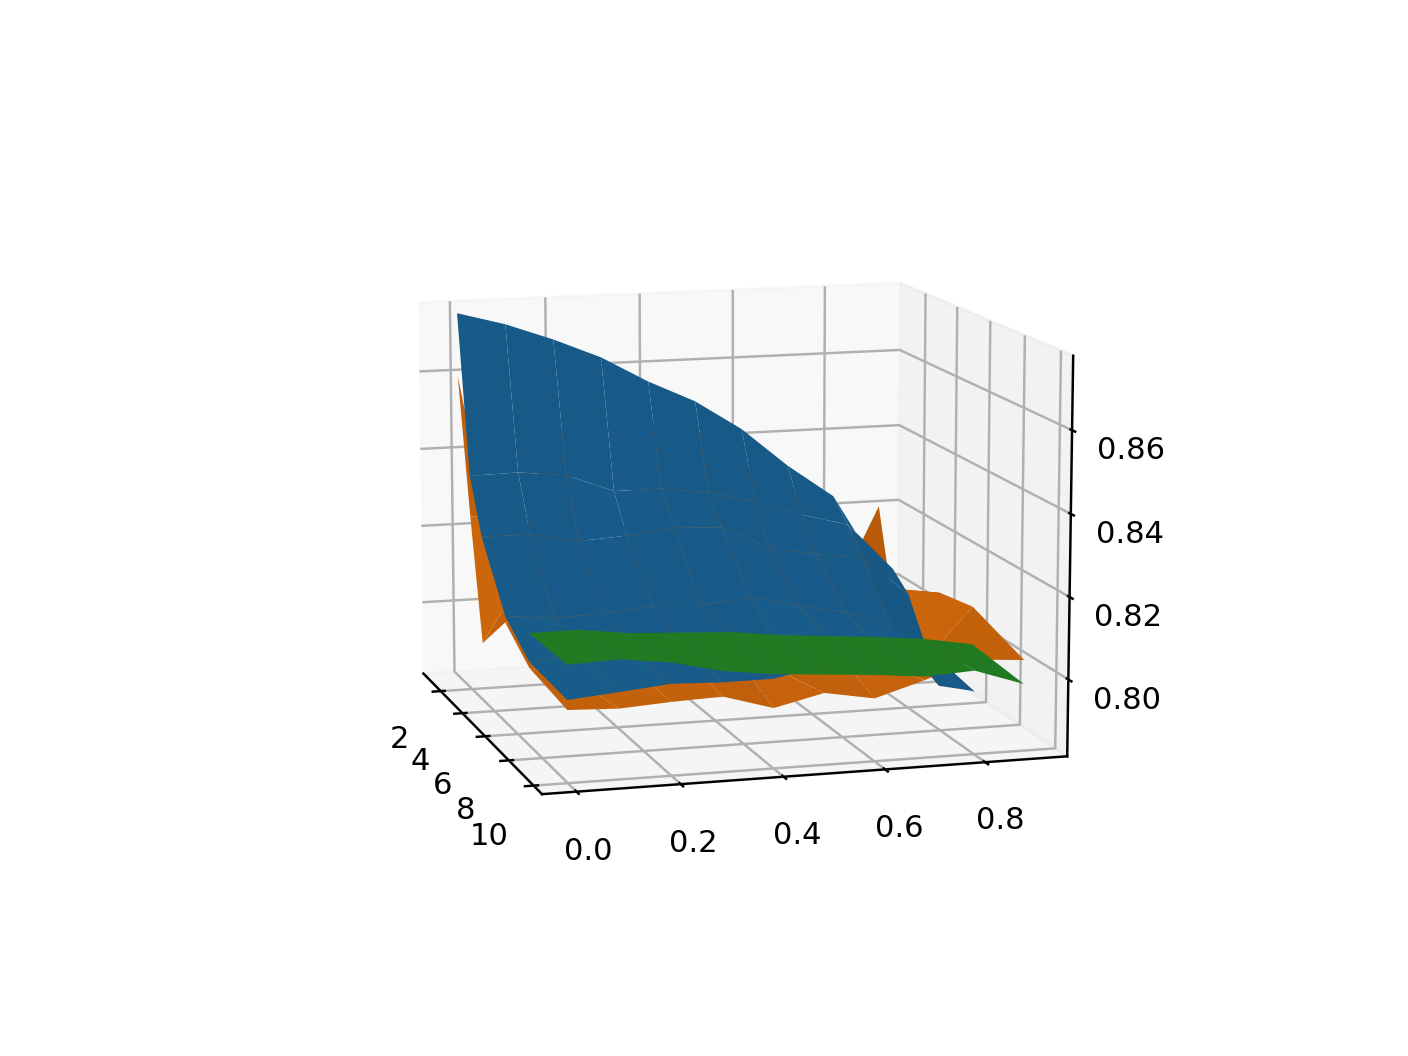

/home/gsnearing/anaconda3/envs/neuralhydrology/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Z contains NaN values. This may result in rendering artifacts.


In [28]:
metric = metrics[0]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

pltdata = autoregression_medians[metric]
X = pltdata.columns.values
Y = pltdata.index.values
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, pltdata.values)

pltdata = assimilation_holdout_medians[metric]
X = pltdata.columns.values
Y = pltdata.index.values
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, pltdata.values)

pltdata = assimilation_noholdout_medians[metric]
X = pltdata.columns.values
Y = pltdata.index.values
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, pltdata.values)

In [27]:
print(assimilation_holdoutstatistics['NSE'].median())
print(simulation_statistics['NSE'].median())

fig = plt.figure()
plt.scatter(simulation_statistics['NSE'][(0.0, 1, 0)], autoregression_statistics['NSE'][(0.0, 1, 0)])
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('autoregression')
plt.xlabel('simulation')
plt.grid()

fig = plt.figure()
plt.scatter(simulation_statistics['NSE'][(0.0, 1, 0)], assimilation_statistics['NSE'][(0.0, 1, 0)])
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('assimilation')
plt.xlabel('simulation')
plt.grid()

fig = plt.figure()
plt.scatter(autoregression_statistics['NSE'][(0.0, 1, 0)], assimilation_statistics['NSE'][(0.0, 1, 0)])
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('assimilation')
plt.xlabel('autoregression')
plt.grid()


NameError: name 'assimilation_holdoutstatistics' is not defined

In [ ]:
simulation_medians[metric] - assimilation_medians[metric]

In [ ]:
file1 = './runs/simulation/assim_hyper_short_tests/test2/test/model_epoch030/test_results.p'
file2 = './runs/simulation/assimilation/0.0_1_0/test/model_epoch030/test_results.p'

with open(file1, 'rb') as f:
    data1 = pkl.load(f)
    
with open(file2, 'rb') as f:
    data2 = pkl.load(f)

test_nses = pd.DataFrame(columns=[1,2], index = data1.keys())
for basin in data1.keys():
    test_nses.loc[basin,1] = data1[basin]['1D']['NSE']
    test_nses.loc[basin,2] = data2[basin]['1D']['NSE']
    
test_nses